# WEEK 1 LABS 2:

In [50]:
using Pkg
Pkg.add("BenchmarkTools")
Pkg.add("Plots")
using BenchmarkTools
using Plots
gr()

   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`
   Resolving package versions...
     Project No packages added to or removed from `~/.julia/environments/v1.12/Project.toml`
    Manifest No packages added to or removed from `~/.julia/environments/v1.12/Manifest.toml`


Plots.GRBackend()

## Exercise 1: Practice Functions:

### Exercise 1a:
Description: Write a function to find the max of n numbers that are in a list.

In [40]:
function maxfinder(a::AbstractVector{<:Real})
    # Accepts an array of any real numbers and returns maximum value of array
    max_val = a[1] #initialize max_val to first element
    for val in a # for loop to iterate through array
        if val > max_val
            max_val = val #updating max_val if current val is greater
        else
            continue
        end
    end
    return max_val #returns the maximum value found
end

# Example usage:
data = [3.5, 2.1, 5.7, 4.9, 6.2]
bench_data = rand(1:1000, 10^6) # large array for benchmarking
maximum_value = maxfinder(data)
personal_bench = @benchmark maxfinder($bench_data)
maxval = maximum(data)
max_bench = @benchmark maximum($bench_data)
println("The maximum value in the array is: ", maximum_value)
println("Handwritten fuction benchmark: ", personal_bench)
println("Julia standard maximum function benchmark: ", max_bench)
println("Pretty close no? Julia's built-in function is faster but not by much! (I am js waffling)")

The maximum value in the array is: 6.2
Handwritten fuction benchmark: Trial(127.833 μs)
Julia standard maximum function benchmark: Trial(118.375 μs)
Pretty close no? Julia's built-in function is faster but not by much! (I am js waffling)


### Exercise 1b:

Description: Write a function to sum all numbers in a list

In [41]:
function sumlist(l::AbstractVector{<:Real})
    # Accepts a 1D array of any real numbers and returns sum of array numbers
    total = 0.0
    for val in l 
        total += val # adds each element to total
    end
    return total # returns sum as a float
end 

# Example usage:
data2 = [1.5, 2.5, 3.5, 4.5]
sum_value = sumlist(data2)
data3 = rand(1:100, 1000) # large array for benchmarking
personal_bench2 = @benchmark sumlist($data3)
sum_bench = @benchmark sum($data3)
println("The sum of the array is: ", sum_value)
println("Handwritten fuction benchmark: ", personal_bench2)
println("Julia standard sum function benchmark: ", sum_bench)

println("Loads of room for improvement")



The sum of the array is: 12.0
Handwritten fuction benchmark: Trial(586.578 ns)
Julia standard sum function benchmark: Trial(55.584 ns)
Loads of room for improvement


### Exercise 1c:
Description: Write a function to reverse a string

In [42]:
function stringreverse(s::String)
    # Accepts a string and returns reversed string, uses backward iteration maybe not most efficient
    reversed = ""
    for char in length(s):-1:1 # iterates backwards through string
        reversed *= s[char]
    end
    return reversed
end

function stringreverse2(s::String)
    # Two pointer approach to reversing string (leetcode style lol)
    char_array = collect(s) # convert string to array of characters
    left = 1
    right = length(char_array)
    while left < right
        # swap characters at left and right pointers
        char_array[left], char_array[right] = char_array[right], char_array[left]
        left += 1
        right -= 1
    end
    return join(char_array) # conversions cost most of the time in benchmarking 
end

# Example usage:
input_string = "Hello, Physics!"
reversed_string = stringreverse(input_string)
reversed_string2 = stringreverse2(input_string)
println("Original string: ", input_string)
println("Reversed string (method 1): ", reversed_string)
println("Reversed string (method 2): ", reversed_string2)

benchmark_string = """Some say the world will end in fire,
Some say in ice.
From what I've tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is also great
And would suffice.""" #credit to robert frost fo the poem for benchmarking

#BENCHMARKING:
personal_bench3 = @benchmark stringreverse($benchmark_string)
reversedstring2_bench = @benchmark stringreverse2($benchmark_string)
builtin_bench = @benchmark reverse($benchmark_string)
println("Handwritten function benchmark: ", personal_bench3)
println("Two pointer handwritten function benchmark: ", reversedstring2_bench)
println("Julia built-in reverse function benchmark: ", builtin_bench)
println("Julia's built-in reverse is still way faster. but we did get a 2x speed up with 2ptr method")

Original string: Hello, Physics!
Reversed string (method 1): !scisyhP ,olleH
Reversed string (method 2): !scisyhP ,olleH
Handwritten function benchmark: Trial(4.486 μs)
Two pointer handwritten function benchmark: Trial(2.236 μs)
Julia built-in reverse function benchmark: Trial(194.124 ns)
Julia's built-in reverse is still way faster. but we did get a 2x speed up with 2ptr method


### Exercise 1d:
Description: Write a function that takes a list and returns a new list with unique elements of the first list.

In [43]:
function unique_finder(array)
    # accepts an array and returns array of unique elements v slow implementation
    unique_elements = []
    for element in array
        if !(element in unique_elements)
            push!(unique_elements, element)
        end
    end 
    return unique_elements
end

function set_unique_finder(array)
    # accepts an array and returns array of unique elements using set structure
    unique_set = Set(array)
    return collect(unique_set)
end


# Example usage:
data4 = [1, 2, 2, 3, 4, 4, 5]
unique_values = unique_finder(data4)
println("Original array: ", data4)
println("Unique elements: ", unique_values)

benchmark_array = rand(1:100, 10^4) # large array for benchmarking
personal_bench4 = @benchmark unique_finder($benchmark_array)
set_bench = @benchmark set_unique_finder($benchmark_array)
builtin_unique_bench = @benchmark unique($benchmark_array)
println("Handwritten function benchmark: ", personal_bench4)
println("Set-based function benchmark: ", set_bench)
println("Julia built-in unique function benchmark: ", builtin_unique_bench)
println("Julia's built-in unique function is neck in neck with set approach.")


Original array: [1, 2, 2, 3, 4, 4, 5]
Unique elements: Any[1, 2, 3, 4, 5]
Handwritten function benchmark: Trial(4.567 ms)
Set-based function benchmark: Trial(35.500 μs)
Julia built-in unique function benchmark: Trial(34.750 μs)
Julia's built-in unique function is neck in neck with set approach.


### Exercise 1e:

Description: Now combine 2 or more of these functions to do something of your wish

In [44]:
println("TO BE DONE")

TO BE DONE


## Exercise 2: Plotting

Explanation:
 The plot will show no value between range of 0 and 1 as log(x-1) is imaginary in the region. In this plot the step size between the range matters a lot both for correct shape and to indicate active detail in the region between f(1) and f(1.5).

 The values for f(1.16) and f(1.46) to a very large number of decimal places but to truly know significant values we must account error based on range of input values.

This won't have any real values between 0 and 1 as log(x-1) is imaginary there so range needs to be between 1 and 4


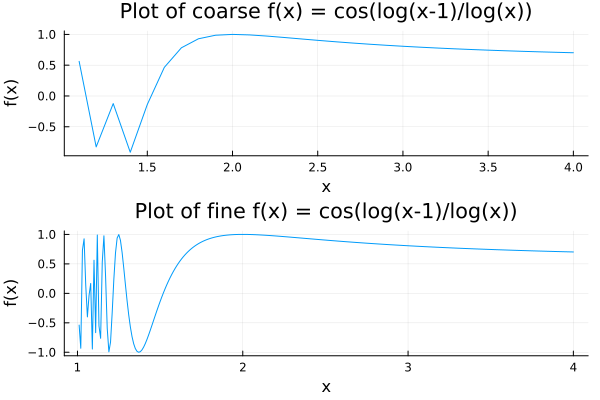

f(1.16) = 0.976092722600062
f(1.46) = -0.4627931407076467


In [54]:
f(x) = cos((log(x-1)/log(x)))
x_val1 = 1.1:0.1:4
x_val2 = 1.01:0.01:4
y_val = f.(x_val)
yval2 = f.(x_val2)
# plot(x_val, y_val, title="Plot of f(x) = cos(log(x-1)/log(x))", xlabel="x", ylabel="f(x)", legend=false)
println("This won't have any real values between 0 and 1 as log(x-1) is imaginary there so range needs to be between 1 and 4")
p = plot(x_val1, y_val, title="Plot of coarse f(x) = cos(log(x-1)/log(x))", xlabel="x", ylabel="f(x)", legend=false)
q = plot(x_val2, yval2, title="Plot of fine f(x) = cos(log(x-1)/log(x))", xlabel="x", ylabel="f(x)", legend=false)
combined = plot(p, q, layout = (2,1))
display(combined)
println("f(1.16) = ", f(1.16))
println("f(1.46) = ", f(1.46))

## Exercise 3:

Explanation:



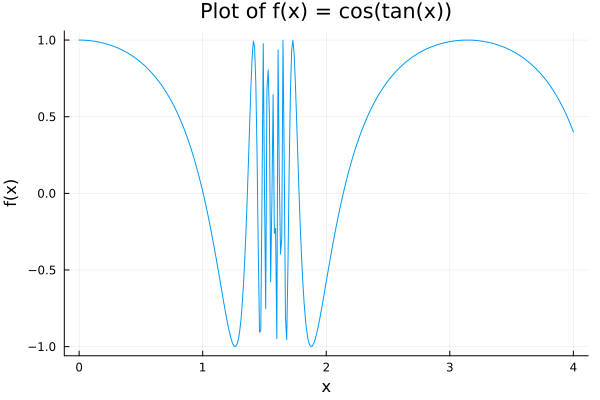

f(1.56) = -0.05645692943426017


In [61]:
f(x) = cos(tan(x)) 
x_vals = 0:0.01:4
y_vals = f.(x_vals)
p = plot(x_vals, y_vals, title="Plot of f(x) = cos(tan(x))", xlabel="x", ylabel="f(x)", legend=false)
display(p)
println("f(1.56) = ", f(1.56))

## Exercise 4: